# Main Notebook - The Office

In [1]:
import pandas as pd
import os
import re
from collections import defaultdict
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
path_cast='C:/Users/Lado/Google Drive/SocialGraphs/Untitled Folder/cast_details.csv'

In [3]:
df = pd.read_csv(path_cast)

# Convert 'Episodes_Count' to numeric (in case it's not)
df['Episodes_Count'] = pd.to_numeric(df['Episodes_Count'], errors='coerce')

# Define a function to extract the first name and last name
def split_name(name):
    # Split the name by spaces
    parts = name.split()
    # The first name is the first part
    first_name = parts[0] if parts else ''
    # The last name is the rest of the parts joined, or the second part if there are only two parts
    last_name = ' '.join(parts[1:]) if len(parts) > 2 else parts[1] if len(parts) == 2 else ''
    return first_name, last_name

# Apply the split_name function to the 'Character' column
df['Character_Name'], df['Character_Surname'] = zip(*df['Character'].apply(split_name))

# Display the modified DataFrame
df[['Actor', 'Character_Name', 'Character_Surname', 'Episodes_Count', 'Years']]

# Filter out rows where 'Episodes_Count' is less than 2
df_filtered = df[df['Episodes_Count'] >= 3]
character_names_list = df_filtered['Character_Name'].tolist()

In [4]:
##########################################################################################################################

## Loading all three folders + graph plot

In [5]:
base_path = "C:/Users/Lado/Google Drive/SocialGraphs/Untitled Folder/"

In [6]:
# Function to find connections
def find_connections(folders, character_names_list):
    # Dictionary to store names and their connections
    connections = defaultdict(list)
    
    # Compile a regular expression pattern to match any name in the list
    names_pattern = re.compile(r'\b(' + '|'.join(map(re.escape, character_names_list)) + r')\b')

    # Iterate over all specified folders
    for folder_path in folders:
        # Check if the folder exists
        if not os.path.exists(folder_path):
            print(f"Folder not found: {folder_path}")
            continue

        # Iterate over all text files in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(folder_path, filename)

                # Read the file content
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()

                    # For each name in the list, find all occurrences and their connections
                    for name in character_names_list:
                        # Find all occurrences of the name followed by a colon
                        pattern = rf"{re.escape(name)}:"
                        for match in re.finditer(pattern, content):
                            # Get the rest of the content after the name
                            following_content = content[match.end():]
                            # Find the next three names that are also in the character_names_list
                            following_names = names_pattern.findall(following_content)
                            # Removing the speaker's name
                            filtered_names = [n for n in following_names if n != name]
                            # Get the next three names, including duplicates
                            connections[name].extend(filtered_names[:3])

    return connections

folder_paths = [os.path.join(base_path, f"episode_transcripts_pt{i}") for i in range(1, 4)]
connections_dict = find_connections(folder_paths, character_names_list)

# Print the resulting dictionary
for name, conns in connections_dict.items():
    print(f"{name}: {conns}")

Kevin: ['Erin', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Ryan', 'Gabe', 'Ryan', 'Gabe', 'Gabe', 'Gabe', 'Ryan', 'Erin', 'Creed', 'Erin', 'Creed', 'Erin', 'Angela', 'Dwight', 'Jim', 'Dwight', 'Pam', 'Oscar', 'The', 'Pam', 'Pam', 'Dwight', 'Pam', 'Dwight', 'Dwight', 'Stanley', 'Kelly', 'Creed', 'Michael', 'Michael', 'Michael', 'Michael', 'Michael', 'Pam', 'Meredith', 'Andy', 'Michael', 'Andy', 'Michael', 'Michael', 'Michael', 'Michael', 'Kelly', 'Andy', 'Phyllis', 'The', 'Phyllis', 'The', 'Andy', 'Andy', 'Andy', 'Creed', 'Andy', 'Creed', 'The', 'Pam', 'Jim', 'Darryl', 'Oscar', 'Meredith', 'Oscar', 'Oscar', 'Meredith', 'Kelly', 'Andy', 'Bob', 'Andy', 'Bob', 'Andy', 'Meredith', 'Andy', 'Andy', 'Michael', 'Darryl', 'Andy', 'Darryl', 'Andy', 'Darryl', 'Andy', 'Andy', 'Darryl', 'Andy', 'Darryl', 'Andy', 'Darryl', 'Darryl', 'Andy', 'Andy', 'Andy', 'Darryl', 'Phyllis', 'Phyllis', 'Stanley', 'The', 'Oscar', 'Michael', 'Oscar', 'Ryan', 'Creed', 'Jim', 'Phyllis', 'Dwight', 'Pam', '

In [7]:
def count_connections(connections_dict):
    # New dictionary to store counts
    connections_count_dict = {}

    for name, connections in connections_dict.items():
        # Count the occurrences of each connection
        connection_counts = Counter(connections)
        # Sort the connections by count in descending order
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        # Format the count as 'name count'
        formatted_counts = [f"{conn}" for conn, count in sorted_counts]
        # Assign to the new dictionary
        connections_count_dict[name] = formatted_counts

    return connections_count_dict

# Count the connections
connections_count_dict = count_connections(connections_dict)

# Print the resulting dictionary in descending order of counts
for name, conns in connections_count_dict.items():
    print(f"{name}: {conns}")

Kevin: ['Michael', 'Oscar', 'Angela', 'Dwight', 'Pam', 'Jim', 'Andy', 'Darryl', 'Erin', 'The', 'Phyllis', 'Ryan', 'Meredith', 'Creed', 'Toby', 'Kelly', 'Stanley', 'Holly', 'Robert', 'Nellie', 'Gabe', 'Roy', 'Jan', 'Pete', 'Jo', 'Deangelo', 'Val', 'Karen', 'Lynn', 'Todd', 'Charles', 'Bob', 'David', 'Clark', 'Isabel', 'Mose', 'Ravi', 'A.', 'Carol', 'Helene', 'State', 'Katy', 'Jessica', 'Athlead', 'Hannah', 'Donna', 'Josh', 'Billy', 'Jada', 'Madge', 'Gerald', 'Cathy', 'Nate', 'Hank', 'Gil', 'Calvin', 'Nick', 'Blue', 'Lonny', 'Elizabeth']
Angela: ['Dwight', 'Michael', 'Oscar', 'Pam', 'Kevin', 'Andy', 'Jim', 'Phyllis', 'Meredith', 'The', 'Kelly', 'Erin', 'Toby', 'Stanley', 'Ryan', 'Jan', 'Robert', 'Karen', 'Creed', 'Nellie', 'Darryl', 'Mose', 'Gabe', 'Clark', 'Roy', 'Charles', 'Pete', 'Holly', 'Esther', 'Deangelo', 'Isabel', 'David', 'Todd', 'Val', 'A.', 'Bob', 'Nick', 'Katy', 'Carol', 'Hannah', 'State', 'Jo', 'Cathy', 'Tom', 'Tall', 'Nate', 'Helene', 'Gerald', 'Jessica', 'Athlead', 'Brian'

## Undirected Graph plot 

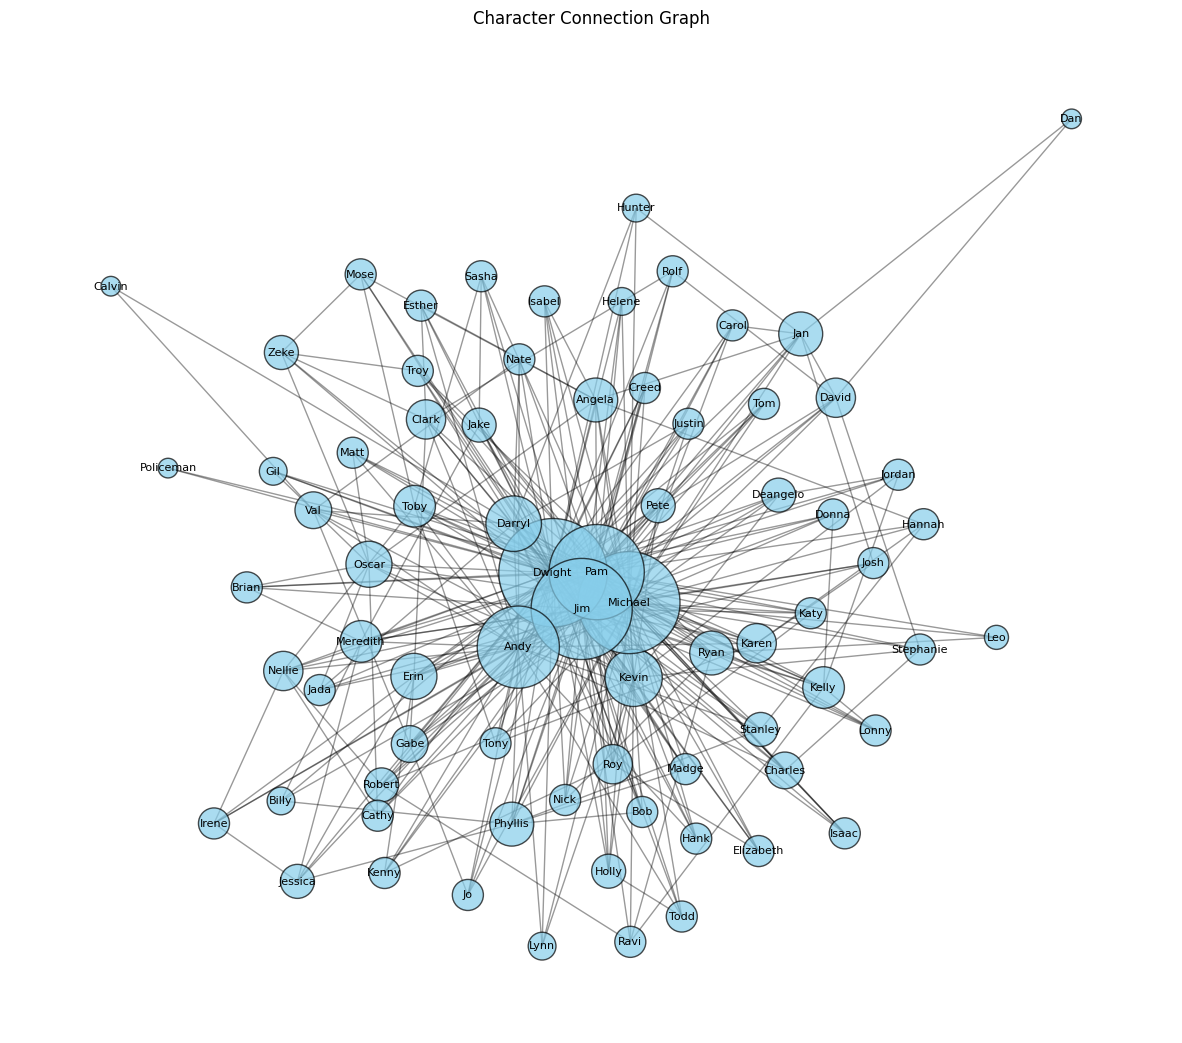

In [8]:
# Function to count connections and return only the top 5
def count_top_connections(connections_dict):
    top_connections_dict = {}
    for name, connections in connections_dict.items():
        connection_counts = Counter(connections)
        sorted_counts = sorted(connection_counts.items(), key=lambda x: x[1], reverse=True)
        top_connections_dict[name] = [conn for conn, count in sorted_counts[:5]]
    return top_connections_dict

def draw_graph(top_connections_dict):
    G = nx.Graph()

    # Add nodes and edges to the graph
    for name, connections in top_connections_dict.items():
        G.add_node(name)
        for conn in connections:
            if conn != 'The':  # Skip 'The'
                G.add_edge(name, conn)
    
    # Calculate node sizes: Use a scaling factor to control the node size increment
    scale_factor = 100  # Adjust the scale factor as needed
    node_sizes = {node: G.degree(node) * scale_factor for node in G.nodes()}

    # Choose a layout that spreads nodes using the Fruchterman-Reingold force-directed algorithm
    pos = nx.spring_layout(G, k=0.3, iterations=50)

    plt.figure(figsize=(15, 13))
    # Draw nodes with alpha transparency
    nx.draw_networkx_nodes(G, pos, node_size=[node_sizes[n] for n in G.nodes()],
                           node_color='skyblue', linewidths=1, edgecolors='black', alpha=0.7)
    # Draw edges with alpha transparency
    nx.draw_networkx_edges(G, pos, alpha=0.4)
    nx.draw_networkx_labels(G, pos, font_size=8, horizontalalignment='center', verticalalignment='center')
    plt.title("Character Connection Graph")
    plt.axis('off')
    plt.show()

# Get the top 5 connections for each character
top_connections_dict = count_top_connections(connections_dict)
# Draw the graph with variable node sizes
draw_graph(top_connections_dict)

## Power law 

In [9]:
import random
import networkx as nx

# Function to test the Friendship Paradox for a given node in graph 'G'
def test_friendship_paradox(node, graph):
    node_degree = graph.degree(node)
    neighbors = list(graph.neighbors(node))
    if not neighbors:  # Skip if node has no neighbors
        return False
    average_friends_degree = sum(graph.degree(neighbor) for neighbor in neighbors) / len(neighbors)
    return average_friends_degree > node_degree

# Function to run the Friendship Paradox test 1000 times
def run_friendship_paradox_tests(graph):
    count_true = 0
    for _ in range(1000):
        random_node = random.choice(list(graph.nodes()))
        if test_friendship_paradox(random_node, graph):
            count_true += 1
    return count_true

# Generate the graph from your actual top_connections_dict
G = nx.Graph()
for name, connections in top_connections_dict.items():
    G.add_node(name)
    for conn in connections:
        if conn != 'The':  # Skip 'The'
            G.add_edge(name, conn)

# Run the tests
paradox_count = run_friendship_paradox_tests(G)
print(f"The Friendship Paradox holds true {paradox_count} out of 1000 times.")

The Friendship Paradox holds true 931 out of 1000 times.


## Directed Graph - In/Out degrees plot 

In [10]:
import networkx as nx
from collections import Counter


# Create a directed graph from the connections
G = nx.DiGraph()

# Add nodes and edges to the graph
for name, connections in connections_dict.items():
    for conn in connections:
        # In a directed graph, add an edge FROM name TO conn
        G.add_edge(name, conn)

# Calculate in-degree and out-degree for each node
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Combine in-degree and out-degree counts for each node
combined_degrees = {node: {'in_degree': in_degrees[node], 'out_degree': out_degrees[node]} for node in G.nodes}
# Find the top 5 characters with the highest in-degree and out-degree
top_in_degree = sorted(in_degrees.items(), key=lambda item: item[1], reverse=True)[:5]
top_out_degree = sorted(out_degrees.items(), key=lambda item: item[1], reverse=True)[:5]
top_in_degree, top_out_degree

([('Dwight', 67), ('Jim', 63), ('Pam', 63), ('Michael', 59), ('Kevin', 53)],
 [('Jim', 79), ('Dwight', 78), ('Michael', 76), ('Pam', 74), ('Andy', 67)])

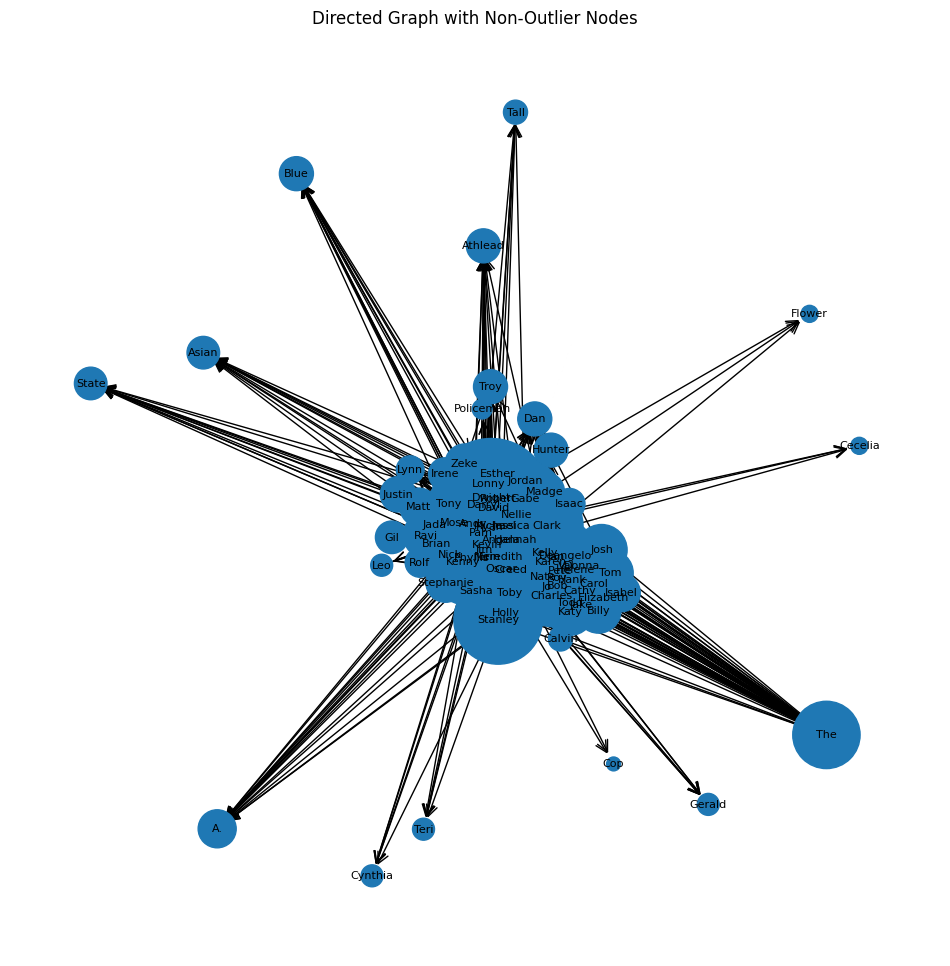

In [11]:
# Calculate the degree of each node (number of connections)
degree_dict = dict(G.degree())

# Filter out nodes with a degree less than a threshold
threshold = 2  # This is an arbitrary threshold for the example
nodes_to_remove = [node for node, degree in degree_dict.items() if degree < threshold]

# Remove nodes
G.remove_nodes_from(nodes_to_remove)

# Calculate the positions of each node using a layout algorithm
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=[v * 50 for v in degree_dict.values()])
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=8)

# Show the plot
plt.title("Directed Graph with Non-Outlier Nodes")
plt.axis('off')
plt.show()

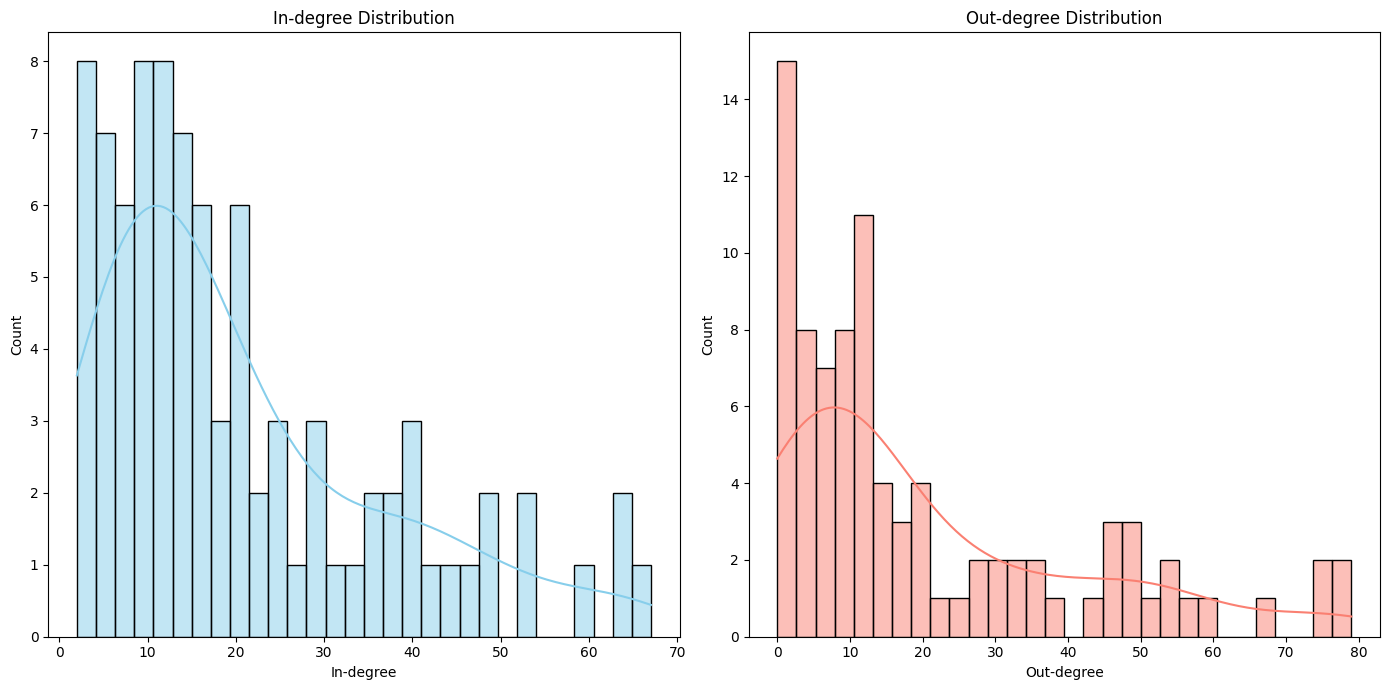

In [12]:
import seaborn as sns
# In and Out Degree Distributions
in_degrees = [val for (node, val) in G.in_degree()]
out_degrees = [val for (node, val) in G.out_degree()]

def plot_degree_distributions(in_degrees, out_degrees):
    plt.figure(figsize=(14, 7))

    # In-degree plot
    plt.subplot(1, 2, 1)
    sns.histplot(in_degrees, bins=30, kde=True, color='skyblue')
    plt.title('In-degree Distribution')
    plt.xlabel('In-degree')
    plt.ylabel('Count')

    # Out-degree plot
    plt.subplot(1, 2, 2)
    sns.histplot(out_degrees, bins=30, kde=True, color='salmon')
    plt.title('Out-degree Distribution')
    plt.xlabel('Out-degree')

    plt.tight_layout()
    plt.show()

plot_degree_distributions(in_degrees, out_degrees)

## Sentiment analysis - characters 

PLOTTING NOTE: Because of the for loop is imposible to modify label names, so it should be run three times, with changing name from seasons 7-9 to 4-6 and 1-3...and saving plot for each of this cases.

In [13]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# Define paths to the sentiment dataset and the folders containing text files
base_folder_path = 'C:\\Users\\Lado\\Google Drive\\SocialGraphs\\Untitled Folder'
sentiment_data_path = os.path.join(base_folder_path, 'episode_transcripts_pt1', 'Data_Set_S1.txt')
dialog_folders = ['dialog_episode_transcripts_pt1', 'dialog_episode_transcripts_pt2', 'dialog_episode_transcripts_pt3', 'dialog_all']

# Load sentiment scores from the Data_Set_S1 file
sentiment_scores = {}
with open(sentiment_data_path, 'r', encoding='utf-8') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split('\t')
        word = parts[0].lower()
        score = float(parts[2])  # Use the 'happiness_average' for the sentiment score
        sentiment_scores[word] = score

# Function to calculate average sentiment for each .txt file in a given directory
def calculate_average_sentiment(dialog_folder_path):
    character_sentiments = {}
    for filename in os.listdir(dialog_folder_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(dialog_folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                words = re.findall(r'\w+', file.read().lower())  # Extract words from entire file content

            # Proceed only if the file has more than 50 words
            if len(words) > 50:
                total_score = sum(sentiment_scores.get(word, 0) for word in words)
                word_count = sum(1 for word in words if word in sentiment_scores)
                # Calculate average score for this file, if there are words to count
                average_score = total_score / word_count if word_count else float('nan')
                character_name = filename[:-4]  # Remove .txt from the filename
                character_sentiments[character_name] = average_score
    return character_sentiments

# Calculate average sentiment for each folder and store them
all_sentiments = {folder: calculate_average_sentiment(os.path.join(base_folder_path, folder)) for folder in dialog_folders}

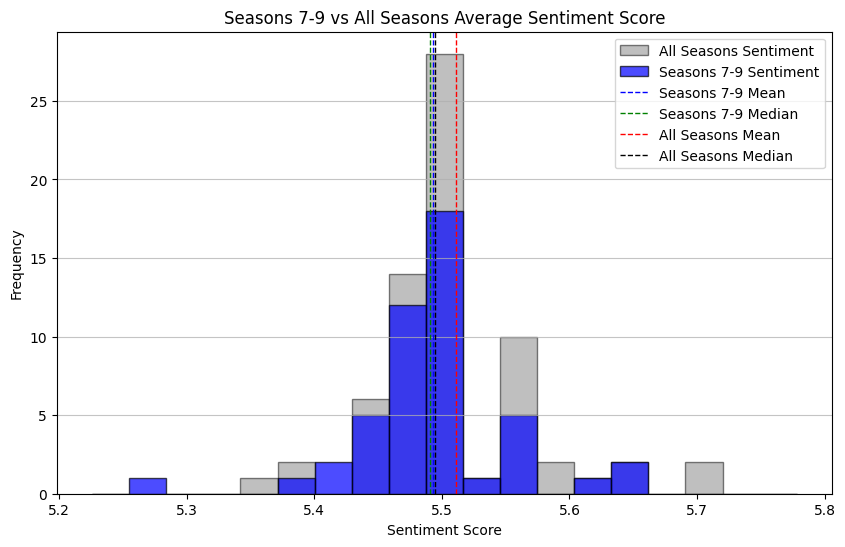

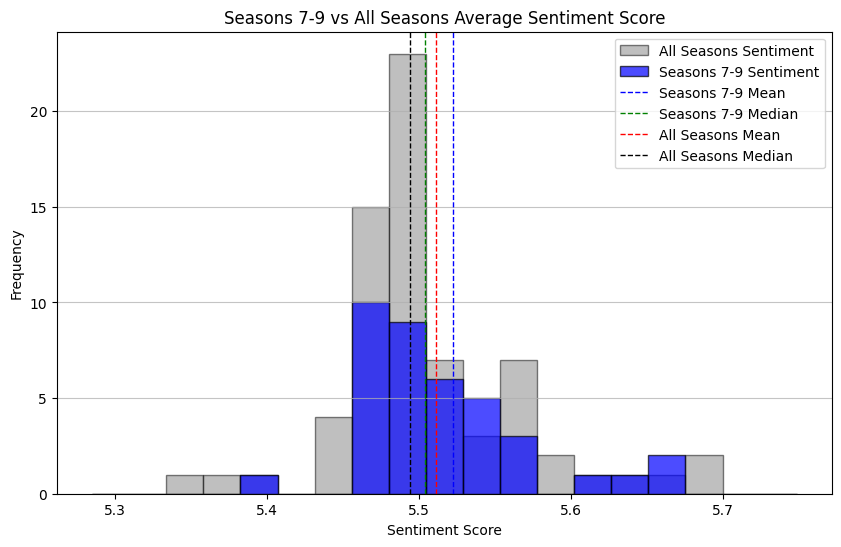

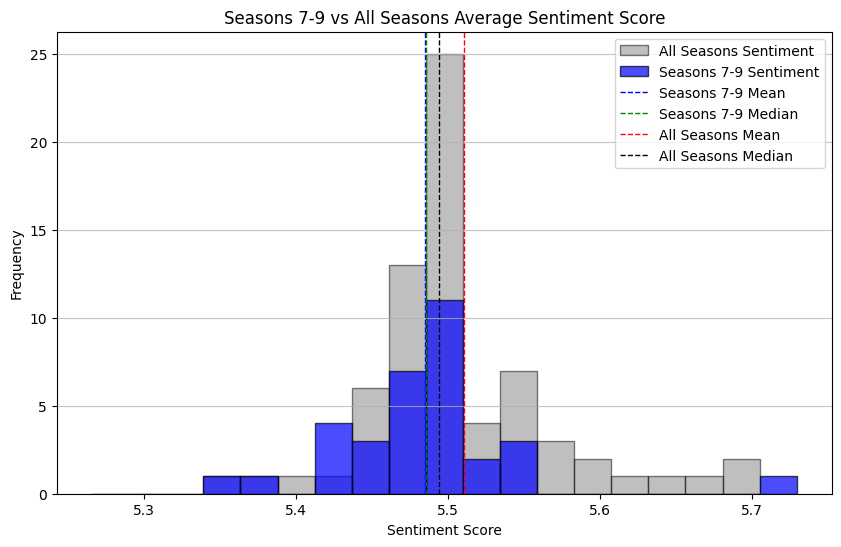

In [14]:
# Function to plot histogram comparing one folder to dialog_all with mean and median
def plot_comparison_histogram(folder_name, all_folder_name, all_sentiments):
    # Extract sentiment scores
    folder_scores = list(all_sentiments[folder_name].values())
    all_folder_scores = list(all_sentiments[all_folder_name].values())

    # Filter out non-sentiment scores (nan)
    folder_scores = [score for score in folder_scores if score >= 0]
    all_folder_scores = [score for score in all_folder_scores if score >= 0]

    # Calculate mean and median
    folder_mean = np.mean(folder_scores)
    folder_median = np.median(folder_scores)
    all_folder_mean = np.mean(all_folder_scores)
    all_folder_median = np.median(all_folder_scores)

    # Define the range of the histograms to be centered around the overall mean
    min_edge = min(folder_scores + all_folder_scores)
    max_edge = max(folder_scores + all_folder_scores)
    range_center = (all_folder_mean + folder_mean) / 2
    left_edge = range_center - (max_edge - min_edge) / 2
    right_edge = range_center + (max_edge - min_edge) / 2
    bins = np.linspace(left_edge, right_edge, 20)

    # Plot histograms
    plt.figure(figsize=(10, 6))
    plt.hist(all_folder_scores, bins, alpha=0.5, label='All Seasons Sentiment', color='grey', edgecolor='black')
    plt.hist(folder_scores, bins, alpha=0.7, label='Seasons 7-9 Sentiment', color='blue', edgecolor='black')  # Changed from 'red' to 'blue'

    # Add lines for mean and median
    plt.axvline(folder_mean, color='blue', linestyle='dashed', linewidth=1, label='Seasons 7-9 Mean')
    plt.axvline(folder_median, color='green', linestyle='dashed', linewidth=1, label='Seasons 7-9 Median')
    plt.axvline(all_folder_mean, color='red', linestyle='dashed', linewidth=1, label='All Seasons Mean')
    plt.axvline(all_folder_median, color='black', linestyle='dashed', linewidth=1, label='All Seasons Median')

    # Plot formatting
    plt.title('Seasons 7-9 vs All Seasons Average Sentiment Score')
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Call the plot function for each folder compared to dialog_all
for folder in dialog_folders[:-1]:  # Exclude 'dialog_all'
    plot_comparison_histogram(folder, 'dialog_all', all_sentiments)